In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [101]:
df = pd.read_csv('D:\Education\Projects\Types-of-movies-search-around-the-world\MoviesSearchFromGoogleTrends.csv', skiprows=1)

In [102]:
df.head()

,الشهر,Action movies: (في جميع أنحاء العالم),Comedy movies: (في جميع أنحاء العالم),Horror movies: (في جميع أنحاء العالم),Family movies: (في جميع أنحاء العالم),Romance movies: (في جميع أنحاء العالم)
0,2004-01,3,4,9,3,1
1,2004-02,5,3,7,3,1
2,2004-03,4,3,8,3,1
3,2004-04,4,3,8,3,1
4,2004-05,3,3,8,3,1


# Data Wrangling

In [103]:
df.columns = ['Date', 'Romance_movies', 'Family_movies', 'Horror_movies', 'Comedy_movies', 'Action_movies']

In [104]:
df.head()

,Date,Romance_movies,Family_movies,Horror_movies,Comedy_movies,Action_movies
0,2004-01,3,4,9,3,1
1,2004-02,5,3,7,3,1
2,2004-03,4,3,8,3,1
3,2004-04,4,3,8,3,1
4,2004-05,3,3,8,3,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            215 non-null    object
 1   Romance_movies  215 non-null    int64 
 2   Family_movies   215 non-null    int64 
 3   Horror_movies   215 non-null    int64 
 4   Comedy_movies   215 non-null    int64 
 5   Action_movies   215 non-null    object
dtypes: int64(4), object(2)
memory usage: 10.2+ KB


In [106]:
df.Action_movies.value_counts()

7            45
1            41
8            27
4            21
9            18
2            15
5            15
6            14
3            13
أصغر من 1     4
10            2
Name: Action_movies, dtype: int64

In [107]:
def action_edit():
    x = []
    for i in df.Action_movies:
        if i == 'أصغر من 1':
            x.append(0)
            continue
        x.append(i)
    return x

In [108]:
df.Action_movies = action_edit()

In [109]:
df.Date = pd.to_datetime(df.Date)

In [110]:
df.index = df.Date

In [111]:
df.head()

,Date,Romance_movies,Family_movies,Horror_movies,Comedy_movies,Action_movies
Date,,,,,,
2004-01-01,2004-01-01,3,4,9,3,1
2004-02-01,2004-02-01,5,3,7,3,1
2004-03-01,2004-03-01,4,3,8,3,1
2004-04-01,2004-04-01,4,3,8,3,1
2004-05-01,2004-05-01,3,3,8,3,1


In [112]:
df.drop('Date', axis = 1,inplace=True)

In [113]:
df.head()

,Romance_movies,Family_movies,Horror_movies,Comedy_movies,Action_movies
Date,,,,,
2004-01-01,3,4,9,3,1
2004-02-01,5,3,7,3,1
2004-03-01,4,3,8,3,1
2004-04-01,4,3,8,3,1
2004-05-01,3,3,8,3,1


# Exploratory Data Analysis (EDA) 

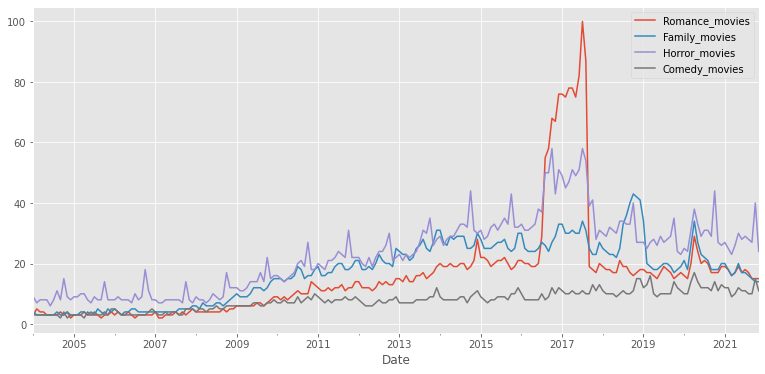

In [114]:
plt.style.use('ggplot')
df.plot(figsize = (13,6));

<AxesSubplot:xlabel='Date'>

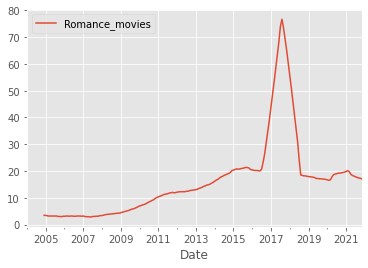

In [115]:
df[['Romance_movies']].rolling(12).mean().plot()

### There is a peak in romance movies type between 2017 to 2018 that reaches 100 frequencey search

<AxesSubplot:xlabel='Date'>

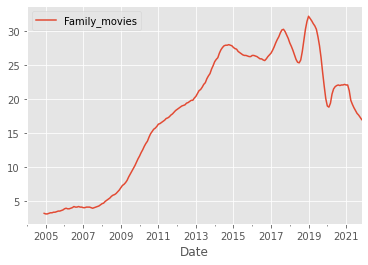

In [116]:
df[['Family_movies']].rolling(12).mean().plot()

### There is a peak in family movies type in 2019 that reaches about 33 frequencey search with increasing trend.

<AxesSubplot:xlabel='Date'>

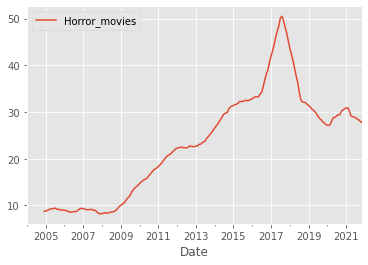

In [117]:
df[['Horror_movies']].rolling(12).mean().plot()

### There is a peak in horror movies type in 2017 that reaches about 51 frequencey search with increasing trend.

<AxesSubplot:xlabel='Date'>

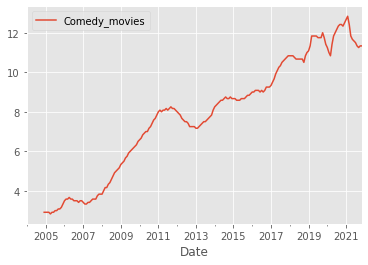

In [118]:
df[['Comedy_movies']].rolling(12).mean().plot()

### The comedy movies type is increasing in trend and the peak is in 2021 with 12 search frequency.

# Linear Regression

In [119]:
df['Time'] = np.arange(len(df.index))

In [120]:
df.head()

,Romance_movies,Family_movies,Horror_movies,Comedy_movies,Action_movies,Time
Date,,,,,,
2004-01-01,3,4,9,3,1,0
2004-02-01,5,3,7,3,1,1
2004-03-01,4,3,8,3,1,2
2004-04-01,4,3,8,3,1,3
2004-05-01,3,3,8,3,1,4


In [121]:
y_r = df[['Romance_movies']]
y_f = df[['Family_movies']]
y_h = df[['Horror_movies']]
y_c = df[['Comedy_movies']]
y_a = df[['Action_movies']]

In [122]:
X = df[['Time']]

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
def model_training(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

In [125]:
def prediction(model, y):
    return model.predict([[y]])

In [126]:
model_r = model_training(X, y_r)

In [127]:
prediction(model_r, 0)

C:\Users\bedoe\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.73217054]])

In [128]:
model_f = model_training(X, y_f)
prediction(model_f, 0)

C:\Users\bedoe\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.31046512]])

In [129]:
model_h = model_training(X, y_h)
prediction(model_h, 0)

C:\Users\bedoe\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.70620155]])

In [130]:
model_c = model_training(X, y_c)
prediction(model_c, 0)

C:\Users\bedoe\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.774677]])

In [131]:
model_a = model_training(X, y_a)
prediction(model_a, 0)

C:\Users\bedoe\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.55103359]])